# **Usando modelos pré-treinados no PyTorch**


**Veja todos os modelos disponíveis no PyTorch aqui** - https://pytorch.org/vision/main/models.html

## 1. Carregando o modelo VGG16

Primeiramente, este modelo foi publicado por https://arxiv.org/abs/1409.1556. 

Sua arquitetura é composta por:
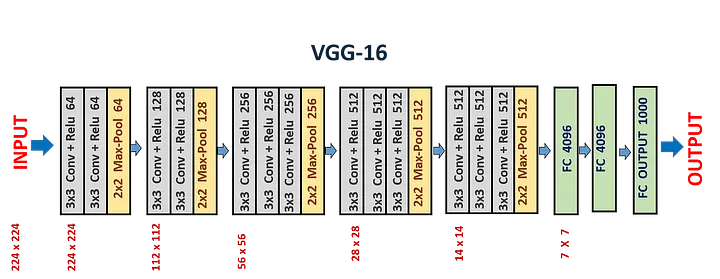

Ela possi 16 camadas (sem contar max pooling), tendo 3 somente de camadas lineares.

In [3]:
import torchvision.models as models
import torch

model = models.vgg16(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
    

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
#Vendo o número de parâmetros do modelo para cada camada
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Nº parameters: {param.numel()}")


Layer: features.0.weight | Size: torch.Size([64, 3, 3, 3]) | Nº parameters: 1728
Layer: features.0.bias | Size: torch.Size([64]) | Nº parameters: 64
Layer: features.2.weight | Size: torch.Size([64, 64, 3, 3]) | Nº parameters: 36864
Layer: features.2.bias | Size: torch.Size([64]) | Nº parameters: 64
Layer: features.5.weight | Size: torch.Size([128, 64, 3, 3]) | Nº parameters: 73728
Layer: features.5.bias | Size: torch.Size([128]) | Nº parameters: 128
Layer: features.7.weight | Size: torch.Size([128, 128, 3, 3]) | Nº parameters: 147456
Layer: features.7.bias | Size: torch.Size([128]) | Nº parameters: 128
Layer: features.10.weight | Size: torch.Size([256, 128, 3, 3]) | Nº parameters: 294912
Layer: features.10.bias | Size: torch.Size([256]) | Nº parameters: 256
Layer: features.12.weight | Size: torch.Size([256, 256, 3, 3]) | Nº parameters: 589824
Layer: features.12.bias | Size: torch.Size([256]) | Nº parameters: 256
Layer: features.14.weight | Size: torch.Size([256, 256, 3, 3]) | Nº parame

## **Normalização**

Todos os modelos pré-treinados esperam imagens de entrada **normalizadas** da mesma forma, ou seja, mini-lotes de imagens RGB de 3 canais com formato (3 x H x W), onde H e W devem ter pelo menos 224. As imagens devem ser carregadas em um intervalo de [0, 1] e, em seguida, normalizadas usando média = [0,485, 0,456, 0,406] e desvio padrão = [0,229, 0,224, 0,225]. Você pode usar a seguinte transformação para normalizar:

`normalize = transforms.Normalize(mean=[0,485, 0,456, 0,406],
                                 std=[0,229, 0,224, 0,225])`

In [6]:
from torchvision import datasets, transforms, models

data_dir = './images'

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                       #                   [0.229, 0.224, 0.225])
                                     ])

**NOTA**

```net.eval()``` é uma espécie de interruptor para algumas camadas/partes específicas do modelo que se comportam de maneira diferente durante o treinamento e a inferência (avaliação). Por exemplo, camadas Dropouts, camadas BatchNorm etc. Você precisa desativá-las durante a avaliação do modelo, e .eval() fará isso por você. Além disso, a prática comum para avaliação/validação é usar torch.no_grad() em conjunto com model.eval() para desativar o cálculo de gradientes:

In [7]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Rodando algumas inferências

In [8]:
import torch
import json
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open('imageNetclasses.json') as f:
  class_names = json.load(f)

In [9]:
def predict_image(images, class_names):
    to_pil = transforms.ToPILImage()
    fig=plt.figure(figsize=(16,16))

    for (i,image) in enumerate(images):
      # Convert to image and tensor
      image = to_pil(image)
      image_tensor = test_transforms(image).float()
      image_tensor = image_tensor.unsqueeze_(0)
      input = Variable(image_tensor)
      input = input.to(device)
      output = model(input)
      index = output.data.cpu().numpy().argmax()
      name = class_names[str(index)]
      
      # Plot image
      sub = fig.add_subplot(len(images),1, i+1)
      sub.set_title(f'Predicted {str(name)}')
      plt.axis('off')
      plt.imshow(image)
    plt.show()

In [10]:
def get_images(directory='./images'):
    data = datasets.ImageFolder(directory, transform=test_transforms)
    num_images = len(data)
    loader = torch.utils.data.DataLoader(data, batch_size=num_images)
    dataiter = iter(loader)
    images, labels = next(dataiter)
    images, labels = images.to('cuda'), labels.to('cuda')
    return images

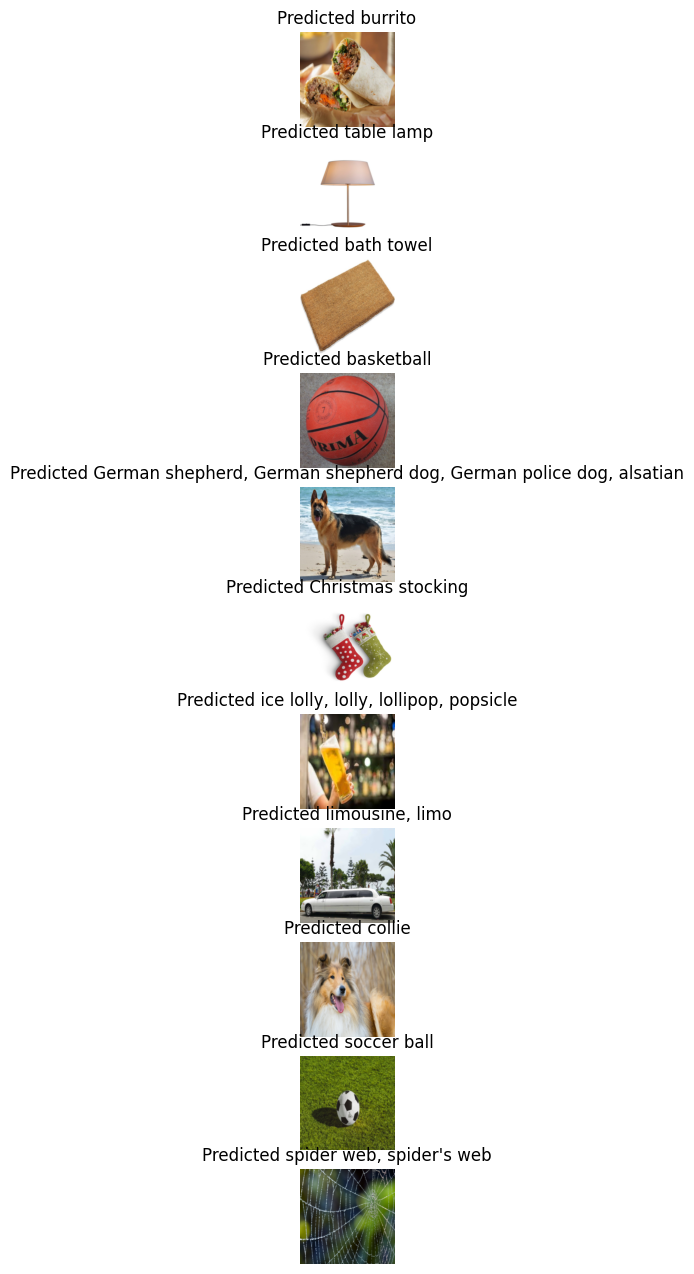

In [11]:
images = get_images('./images')
predict_image(images, class_names)